# Simple Artificial Neural Network
Inspired by welch labs Neural Networks demystified

In [57]:
# Package for scientific computing
import numpy as np

In [58]:
# Make up sample data for our training

# Independent/predictor variables ([hours sleep, hours study])
X = np.array(([6, 2],[8, 1],[4, 0], [9, 3], [7, 1]), dtype=float)

# Dependent/predicted variables (score in test)
y = np.array(([85], [84], [70], [98], [80]), dtype=float)

In [59]:
X

array([[ 6.,  2.],
       [ 8.,  1.],
       [ 4.,  0.],
       [ 9.,  3.],
       [ 7.,  1.]])

In [60]:
y

array([[ 85.],
       [ 84.],
       [ 70.],
       [ 98.],
       [ 80.]])

In [61]:
# Data optimization for better performance 

# Feature scaling
X = X / np.amax(X, axis = 0)
y = y / 100 # 100 would be the max score

# Mean normalisation
X = X - np.mean(X, axis=0)
y = y - np.mean(y, axis=0)

In [62]:
X

array([[-0.08888889,  0.2       ],
       [ 0.13333333, -0.13333333],
       [-0.31111111, -0.46666667],
       [ 0.24444444,  0.53333333],
       [ 0.02222222, -0.13333333]])

In [63]:
# 2D plotting library
import matplotlib.pyplot as plt

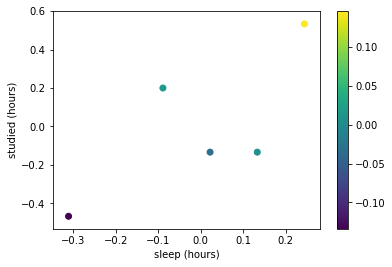

In [65]:
# Visualizing our data for some data exploration ;)
plt.scatter(X[:, 0], X[:,1], c=y)
plt.xlabel('sleep (hours)')
plt.ylabel('studied (hours)')
plt.colorbar()
plt.show()